# Real estate price predictionabs

## Import libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix

## Fetching data

In [2]:
housing = pd.read_csv('data.csv')

In [3]:
housing.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    449
1     57
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.112648,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.316475,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [7]:
# For plotting histogram
# housing.hist(bins=50, figsize=(20, 20))
# plt.show()

## Train-Test splitting

In [8]:
def split_train_test(data, test_ratio):
    """Splitting train and test data"""
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    # print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]    

In [9]:
# Using user defined function
# train_set, test_set = split_train_test(housing, 0.2)

In [10]:
# Using scikit lean function
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
print(f"Train length: {len(train_set)}\nTest length: {len(test_set)}")

Train length: 404
Test length: 102


In [12]:
splitObj = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
iter = splitObj.split(housing, housing['CHAS'])
for train_index, test_index in iter:
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_train_set['CHAS'].value_counts()

CHAS
0    358
1     46
Name: count, dtype: int64

In [14]:
strat_test_set['CHAS'].value_counts()

CHAS
0    91
1    11
Name: count, dtype: int64

In [15]:
print(f'Persentage of 1s in both the dataset : Train- {46*100/(46+358)} : Test- {11*100/(91+11)}')

Persentage of 1s in both the dataset : Train- 11.386138613861386 : Test- 10.784313725490197


## Looking for cor-relation

In [16]:
corr_metrix = housing.corr()
corr_metrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.740181
ZN         0.331570
B          0.264797
CHAS       0.154409
DIS        0.138798
RAD       -0.217902
CRIM      -0.286245
AGE       -0.299893
NOX       -0.332778
TAX       -0.345898
INDUS     -0.411915
PTRATIO   -0.461214
LSTAT     -0.706255
Name: MEDV, dtype: float64

In [17]:
# attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
# scatter_matrix(housing[attributes], figsize=(12, 8))


<Axes: xlabel='RM', ylabel='MEDV'>

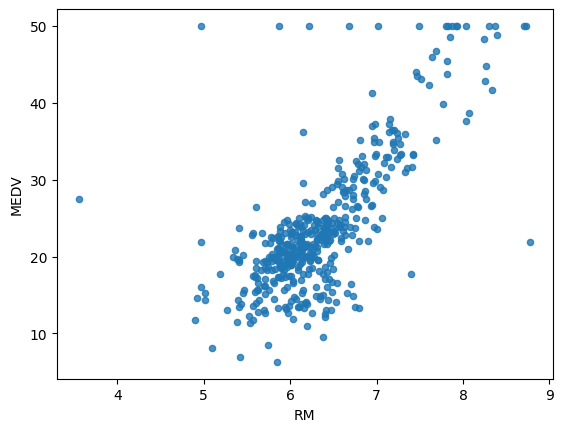

In [18]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8)

## Trying out attribute combination

In [19]:
housing['TAXRM'] = housing['TAX'] / housing['RM']

In [20]:
corr_metrix = housing.corr()
corr_metrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.740181
ZN         0.331570
B          0.264797
CHAS       0.154409
DIS        0.138798
RAD       -0.217902
CRIM      -0.286245
AGE       -0.299893
NOX       -0.332778
TAX       -0.345898
INDUS     -0.411915
TAXRM     -0.443257
PTRATIO   -0.461214
LSTAT     -0.706255
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM'>

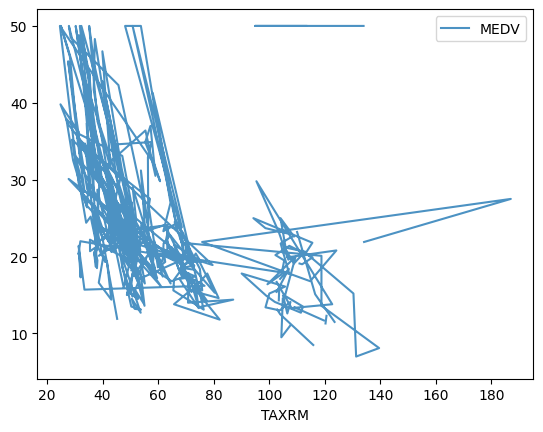

In [24]:
housing.plot(kind='line', x='TAXRM', y='MEDV', alpha=0.8)

In [1]:
print('Hello')

Hello
